In [1]:
# using Pkg
# Pkg.activate(".")
# Pkg.instantiate()

using SNAPDatasets, JLD2, Graphs

using Revise

includet("GrapevineModel.jl")
using .GrapevineModel

In [2]:
function combine_data(data_files...; new_path = "data/combined_data.jld2")
    dicts = [load_object(path) for path in data_files]
    combined_data = merge(dicts...)
    save_object(new_path, combined_data)
end        

combine_data (generic function with 1 method)

In [4]:
combine_data("data/combined_data.jld2", "data/combined_data_v2.jld2", "data/parallel_data.jld2", new_path="data/mega_data.jld2")

# Fixing the source set 

We have an instance:

(0.03642243581439857, 0.055441597228671084, 0.9045333934190385, 0.9852115368286217, [3832, 1456, 1526, 845, 2141, 2735, 1709])	
greedy: Set([1456, 1526, 2141])	0.132889432050925	
optimal: Set([1456, 1526, 1709])	0.1617476815479	
difference, %: 0.217159852755761

Let's fix the source set and try different parameters to see if greedy is still suboptimal.

In [27]:
sources = [3832, 1456, 1526, 845, 2141, 2735, 1709]

7-element Vector{Int64}:
 3832
 1456
 1526
  845
 2141
 2735
 1709

In [28]:
run_influence_experiment(sources = sources, n_exp = 50, data_path = "data/fixed_sources.jld2")

Experiment 50

Let's now fix the parameters and choose new source sets randomly.

In [33]:
run_influence_experiment(
    params = (0.03642243581439857, 0.055441597228671084, 0.9045333934190385, 0.9852115368286217),
    n_exp = 50, data_path = "data/fixed_params.jld2")

Experiment 50

# Normal Experiment 

In [5]:
run_influence_experiment(n_exp = 50, sources = 8, data_path="data/combined_data_v2.jld2")

Experiment 4

LoadError: InterruptException:

# Small Graphs 

In [45]:
using Graphs, GraphIO

In [50]:
graphs = loadgraphs("graphs/graph5c.g6", Graph6Format())

Dict{String, SimpleGraph} with 21 entries:
  "graph6"  => SimpleGraph{Int64}(6, [[4, 5], [4, 5], [5], [1, 2, 5], [1, 2, 3,…
  "graph14" => SimpleGraph{Int64}(5, [[3, 4], [4, 5], [1, 5], [1, 2], [2, 3]])
  "graph11" => SimpleGraph{Int64}(6, [[3, 5], [4, 5], [1, 5], [2, 5], [1, 2, 3,…
  "graph10" => SimpleGraph{Int64}(5, [[3, 5], [4, 5], [1, 5], [2], [1, 2, 3]])
  "graph5"  => SimpleGraph{Int64}(5, [[4, 5], [4, 5], [5], [1, 2], [1, 2, 3]])
  "graph17" => SimpleGraph{Int64}(8, [[3, 4, 5], [4, 5], [1, 4, 5], [1, 2, 3, 5…
  "graph4"  => SimpleGraph{Int64}(5, [[4, 5], [4], [5], [1, 2, 5], [1, 3, 4]])
  "graph19" => SimpleGraph{Int64}(8, [[3, 4, 5], [3, 4, 5], [1, 2, 5], [1, 2, 5…
  "graph12" => SimpleGraph{Int64}(6, [[3, 4, 5], [5], [1, 4, 5], [1, 3], [1, 2,…
  "graph15" => SimpleGraph{Int64}(6, [[3, 4, 5], [4, 5], [1, 5], [1, 2], [1, 2,…
  "graph9"  => SimpleGraph{Int64}(4, [[3, 5], [4, 5], [1], [2], [1, 2]])
  "graph16" => SimpleGraph{Int64}(7, [[3, 4, 5], [4, 5], [1, 5], [1, 2, 5], [1,…
 

In [84]:
data_path = "data/small_graph_analytic.jld2"
for graph in graphs
    println(g)
    (name, g) = graph
    run_influence_experiment(g = g, n_exp = 50, data_path = data_path, sources = 3, 
        graph_name = name, method=:analytic)
end

SimpleGraph{Int64}(10, [[2, 3, 4, 5], [1, 3, 4, 5], [1, 2, 4, 5], [1, 2, 3, 5], [1, 2, 3, 4]])
Experiment 50
SimpleGraph{Int64}(6, [[4, 5], [4, 5], [5], [1, 2, 5], [1, 2, 3, 4]])
Experiment 50
SimpleGraph{Int64}(5, [[3, 4], [4, 5], [1, 5], [1, 2], [2, 3]])
Experiment 50
SimpleGraph{Int64}(6, [[3, 5], [4, 5], [1, 5], [2, 5], [1, 2, 3, 4]])
Experiment 50
SimpleGraph{Int64}(5, [[3, 5], [4, 5], [1, 5], [2], [1, 2, 3]])
Experiment 50
SimpleGraph{Int64}(5, [[4, 5], [4, 5], [5], [1, 2], [1, 2, 3]])
Experiment 50
SimpleGraph{Int64}(8, [[3, 4, 5], [4, 5], [1, 4, 5], [1, 2, 3, 5], [1, 2, 3, 4]])
Experiment 50
SimpleGraph{Int64}(5, [[4, 5], [4], [5], [1, 2, 5], [1, 3, 4]])
Experiment 50
SimpleGraph{Int64}(8, [[3, 4, 5], [3, 4, 5], [1, 2, 5], [1, 2, 5], [1, 2, 3, 4]])
Experiment 50
SimpleGraph{Int64}(6, [[3, 4, 5], [5], [1, 4, 5], [1, 3], [1, 2, 3]])
Experiment 50
SimpleGraph{Int64}(6, [[3, 4, 5], [4, 5], [1, 5], [1, 2], [1, 2, 3]])
Experiment 50
SimpleGraph{Int64}(4, [[3, 5], [4, 5], [1], [2], [1

Check an instance.

In [73]:
g = graphs["graph17"]
sources = [3, 5, 2]
params = (0.08121707604464679, 0.06655139929204701, 0.9440310901800002, 0.9418363628785716)

(0.08121707604464679, 0.06655139929204701, 0.9440310901800002, 0.9418363628785716)

In [77]:
data = run_influence_experiment(g = g, sources = sources, params = params, method=:analytic)

Experiment 1


Dict{Any, Any} with 1 entry:
  (0.0812171, 0.0665514, 0… => Dict([2, 3]=>0.517565, [3]=>0.226161, []=>0.9957…

## Compare Greedy heuristics

In [14]:
g = watts_strogatz(200, 10, 0.1)

{200, 1000} undirected simple Int64 graph

In [18]:
g_ws = loadgraph("graphs/WS_graph.lg")

{200, 1000} undirected simple Int64 graph

In [19]:
@time all_data = run_greedy_experiment(m = 20, g = g_ws, n_exp = 50, data_path="data/WS_greedy_exp2.jld2")

Experiment starting
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
61894.330291 seconds (605.70 G allocations: 32.834 TiB, 6.74% gc time)


Dict{Any, Any} with 900 entries:
  (0.470542, 0.142667, 0.8… => Dict{Any, Any}(:closeness=>0.0777094, :pagerank=…
  (0.314645, 0.294288, 0.6… => Dict{Any, Any}(:closeness=>0.0164581, :pagerank=…
  (0.071292, 0.25034, 0.77… => Dict{Any, Any}(:closeness=>0.621644, :pagerank=>…
  (0.331506, 0.495557, 0.9… => Dict{Any, Any}(:closeness=>0.019226, :pagerank=>…
  (0.223725, 0.248303, 0.6… => Dict{Any, Any}(:closeness=>0.227441, :pagerank=>…
  (0.313855, 0.227496, 0.9… => Dict{Any, Any}(:closeness=>0.100821, :pagerank=>…
  (0.289948, 0.289367, 0.8… => Dict{Any, Any}(:closeness=>0.0627552, :pagerank=…
  (0.498749, 0.0119617, 0.… => Dict{Any, Any}(:closeness=>0.0220677, :pagerank=…
  (0.34254, 0.119375, 0.99… => Dict{Any, Any}(:closeness=>0.0928778, :pagerank=…
  (0.301702, 0.129259, 0.8… => Dict{Any, Any}(:closeness=>0.20902, :pagerank=>0…
  (0.413249, 0.142949, 0.9… => Dict{Any, Any}(:closeness=>0.257455, :pagerank=>…
  (0.351844, 0.412049, 0.9… => Dict{Any, Any}(:closeness=>0.00400976, :pager

In [84]:
data = [all_data[key] for key in keys(all_data) if key[end] == 8]


40-element Vector{Dict{Any, Any}}:
 Dict(:closeness => 0.006898746919263843, :pagerank => 0.007320034501153372, :degree => 0.007012643861012413, :greedy => 0.008031194680205633, :random => 0.00749288743431531, :radiality => 0.006927046188784258)
 Dict(:closeness => 0.014567021911601308, :pagerank => 0.015155738181737877, :degree => 0.01415349396153065, :greedy => 0.014533414563948965, :random => 0.013298106570177604, :radiality => 0.014833625513591686)
 Dict(:closeness => 0.06450196324808466, :pagerank => 0.062018254421126184, :degree => 0.060940415764097144, :greedy => 0.07145453369081622, :random => 0.061329841758328785, :radiality => 0.06355432090576518)
 Dict(:closeness => 0.1854893938647757, :pagerank => 0.18184957574989868, :degree => 0.1845462086386317, :greedy => 0.18700310885168636, :random => 0.15847618157614707, :radiality => 0.18241700623787394)
 Dict(:closeness => 0.21925350354654305, :pagerank => 0.21231074129174743, :degree => 0.21306258585780902, :greedy => 0.2240352801

In [87]:
data[4]

Dict{Any, Any} with 6 entries:
  :closeness => 0.185489
  :pagerank  => 0.18185
  :degree    => 0.184546
  :greedy    => 0.187003
  :random    => 0.158476
  :radiality => 0.182417

In [93]:
t = 6:2:19
algs = [:greedy, :random, :closeness, :pagerank, :degree, :harmonic] 
data=[]

plot_data = Dict(algs .=> [zeros(length(t)) for a in algs])
for i in 1:length(t)
    k = t[i]
    data = [all_data2[key] for key in keys(all_data2) if key[end] == k]
    for d in data
        for a in algs
            plot_data[a][i] += (d[a]-d[:random])/d[:random]
        end
    end
end

In [94]:
plot_data[:closeness]

7-element Vector{Float64}:
 8.602076288234542
 7.34947910352666
 8.249480974996542
 4.197153078480157
 3.4374116009976046
 2.412280878090456
 1.0200195643530507

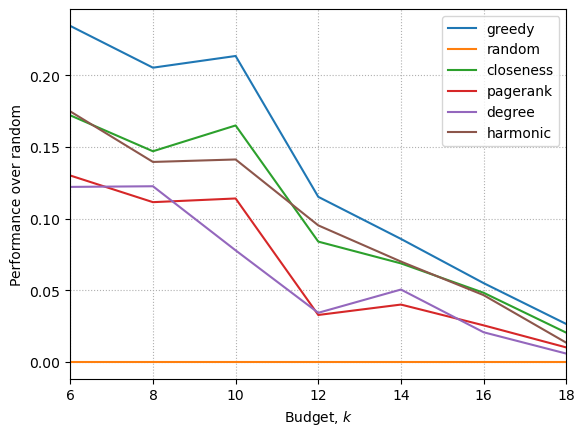

In [107]:
using PyPlot
for a in algs
    plot(plot_data[a]./50, label=a)
end
legend()
xticks(0:length(t)-1, t)
xlabel("Budget, "*L"k")
ylabel("Performance over random")
PyPlot.grid(ls=":")
xlim([0, length(t)-1])
savefig("figs/WS_exp.png", bbox_inches="tight")
savefig("figs/WS_exp.pdf", bbox_inches="tight")

### Heuristics on random graphs

In [3]:
g_er = loadgraph("graphs/ER_graph.lg")

{200, 1974} undirected simple Int64 graph

In [11]:
@time all_data = run_greedy_experiment(m = 20, g = g_er, n_exp = 20, data_path="data/greedy_exp_ER.jld2")

Experiment starting
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
14430.213595 seconds (228.68 G allocations: 12.224 TiB, 10.74% gc time, 0.02% compilation time)


Dict{Any, Any} with 720 entries:
  (0.382448, 0.0698973, 0.… => Dict{Any, Any}(:closeness=>0.583025, :pagerank=>…
  (0.162241, 0.490831, 0.5… => Dict{Any, Any}(:closeness=>0.0981479, :pagerank=…
  (0.19083, 0.243557, 0.51… => Dict{Any, Any}(:closeness=>0.169918, :pagerank=>…
  (0.0414098, 0.411954, 0.… => Dict{Any, Any}(:closeness=>0.0883928, :pagerank=…
  (0.255579, 0.260621, 0.8… => Dict{Any, Any}(:closeness=>0.482967, :pagerank=>…
  (0.143225, 0.265992, 0.5… => Dict{Any, Any}(:closeness=>0.546408, :pagerank=>…
  (0.304698, 0.250894, 0.5… => Dict{Any, Any}(:closeness=>0.0718587, :pagerank=…
  (0.0856013, 0.00924242, … => Dict{Any, Any}(:closeness=>0.0677573, :pagerank=…
  (0.464856, 0.407145, 0.8… => Dict{Any, Any}(:closeness=>0.00181851, :pagerank…
  (0.091336, 0.278533, 0.8… => Dict{Any, Any}(:closeness=>0.795728, :pagerank=>…
  (0.0886529, 0.0815533, 0… => Dict{Any, Any}(:closeness=>0.753783, :pagerank=>…
  (0.433146, 0.00941208, 0… => Dict{Any, Any}(:closeness=>0.0297954, :pagera

In [12]:
t = 2:19
algs = [:greedy, :random, :closeness, :pagerank, :degree, :harmonic, :eigenvector] 
data=[]

plot_data = Dict(algs .=> [zeros(length(t)) for a in algs])
for i in 1:length(t)
    k = t[i]
    data = [all_data[key] for key in keys(all_data) if key[end] == k]
    for d in data
        for a in algs
            plot_data[a][i] += (d[a]-d[:random])/d[:random]
        end
    end
end

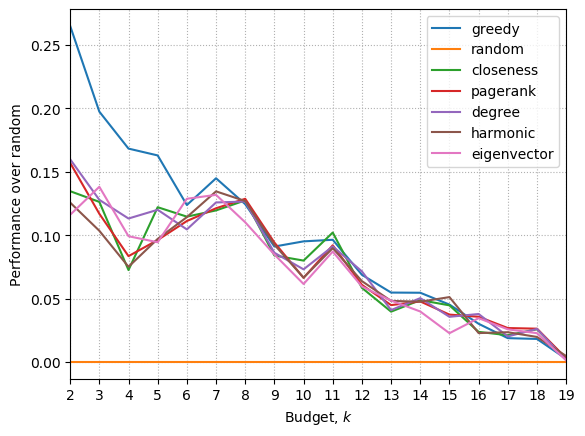

(0, 17)

In [13]:
using PyPlot
for a in algs
    plot(plot_data[a]./50, label=a)
end
legend()
xticks(0:length(t)-1, t)
xlabel("Budget, "*L"k")
ylabel("Performance over random")
PyPlot.grid(ls=":")
xlim([0, length(t)-1])
# savefig("figs/ER_greedy_exp.png", bbox_inches="tight")
# savefig("figs/ER_greedy_exp.pdf", bbox_inches="tight")

## Influence Expermient on Random Graphs

In [16]:
g = erdos_renyi(200, 0.1)

{200, 1974} undirected simple Int64 graph

In [17]:
savegraph("graphs/ER_graph.lg", g)

1

In [ ]:
g_ws = loadgraph("graphs/WS_graph.lg")

In [18]:
@time all_data = run_influence_experiment(g = g_ws, n_exp = 150, data_path="data/influence_exp_ER.jld2", sources=7)

Experiment 50
738.115425 seconds (10.96 G allocations: 676.589 GiB, 14.26% gc time, 0.41% compilation time)


Dict{Any, Any} with 51 entries:
  (0.352765, 0.00898903, 0… => Dict([124, 25, 105, 126, 12]=>0.25235, [124, 25,…
  (0.492515, 0.43665, 0.84… => Dict([114, 21, 44, 18]=>0.00124109, [114, 21, 44…
  (0.0191488, 0.00467395, … => Dict([56, 95, 191, 167, 53]=>0.504395, [56, 191,…
  (0.0699952, 0.287368, 0.… => Dict([176, 122, 105]=>0.331699, [45, 97, 172]=>0…
  (0.139365, 0.495394, 0.7… => Dict([92, 65, 86]=>0.0568879, [65, 10]=>0.043471…
  (0.103873, 0.356275, 0.5… => Dict([188, 175, 97, 129]=>0.0737768, [175, 73]=>…
  (0.314409, 0.243128, 0.6… => Dict([171, 89, 165, 53]=>0.0813787, [89]=>0.0147…
  (0.0756986, 0.0813965, 0… => Dict([176, 135, 149, 140, 40]=>0.723366, [176, 6…
  (0.101314, 0.192412, 0.6… => Dict([169, 93, 79, 190, 38, 37]=>0.390751, [93, …
  (0.460978, 0.310489, 0.6… => Dict([62, 23]=>0.00732894, [77, 168, 181, 138, 2…
  (0.237292, 0.0381607, 0.… => Dict([113, 63, 135, 189, 37]=>0.232718, [113, 63…
  (0.42662, 0.338969, 0.65… => Dict([77, 95, 151, 112]=>0.00772204, [77, 95, 

In [19]:
g = watts_strogatz(200, 10, 0.1)

{200, 1000} undirected simple Int64 graph

In [20]:
savegraph("graphs/WS_graph.lg", g)

1

In [21]:
@time all_data = run_influence_experiment(g = g, n_exp = 50, data_path="data/influence_exp_WS.jld2", sources=7)

Experiment 50
998.343022 seconds (11.75 G allocations: 720.000 GiB, 12.29% gc time)


Dict{Any, Any} with 51 entries:
  (0.491187, 0.161538, 0.7… => Dict([195, 98, 19]=>0.00472917, [98, 140, 109]=>…
  (0.423905, 0.160302, 0.7… => Dict([15, 36, 177, 42, 132]=>0.0094486, [15, 29,…
  (0.196207, 0.353208, 0.8… => Dict([89]=>0.0114197, [98, 89, 75, 148, 96]=>0.0…
  (0.275043, 0.161676, 0.5… => Dict([56, 11, 179, 98, 91]=>0.0446122, [56, 11, …
  (0.0214988, 0.175884, 0.… => Dict([32, 3, 137, 112]=>0.394032, [32, 6, 3]=>0.…
  (0.0616268, 0.286505, 0.… => Dict([166]=>0.0632615, [4, 24, 166]=>0.17402, [9…
  (0.293601, 0.499743, 0.7… => Dict([5, 175, 20, 52, 132]=>0.00453997, [5, 175,…
  (0.492068, 0.150976, 0.7… => Dict([42, 164, 150]=>0.0200942, [94, 164, 186, 2…
  (0.0365095, 0.187149, 0.… => Dict([78, 58, 73, 131, 142]=>0.598713, [78, 79, …
  (0.276773, 0.499307, 0.9… => Dict([61, 8, 40]=>0.00300957, [61, 65, 73, 19]=>…
  (0.390397, 0.379161, 0.5… => Dict([49, 105, 168, 37]=>0.00646599, [49, 2, 31,…
  (0.489866, 0.110502, 0.8… => Dict([113, 12, 167, 73]=>0.0363728, [113, 10, 